In [1]:
import pandas as pd

In [3]:
from CarlaBEV.src.planning.planner import Planner

In [4]:
def append_to_scene(scene_id, actor, class_id):
    scene = []
    start, goal = actor
    scene.append([scene_id, class_id, start, goal, None, None])
    return scene

def compute_routes(scene_df):
    for idx, row in scene_df.iterrows():
        id = 0
        _, class_id, start, goal, _, _ = row
        if class_id == "pedestrians":
            id = 1
        planner = Planner(id)
        rx, ry = planner.find_global_path(start, goal, 1024)
        scene_df.astype({'rx': "object", 'ry': "object"}).dtypes
        scene_df.loc[idx, "rx"] = rx
        scene_df.loc[idx, "ry"] = ry
    return scene_df

def get_scene_df(scene_id, actors_dict):
    scene = []
    cols = ["scene_id", "class", "start", "goal", "rx", "ry"]
    for class_id in actors_dict.keys(): 
        for actors in actors_dict[class_id]:
            scene.extend(append_to_scene(scene_id, actors, class_id))

    scene_df = pd.DataFrame(scene, columns=cols)
    scene_df = compute_routes(scene_df)
    scene_df.to_csv(f"../assets/scenes/{scene_id}.csv")
    return scene_df

In [12]:
scene_id = "scene_1-1"

pedestrians = [
	[(8625, 4500), (8625, 1500)],
	[(8630, 2900), (8630, 1500)],
	[(8770, 6500), (8770, 1800)],
	[(8770, 1800), (8770, 6500)],
]

vehicles = [
	[(8730, 1800), (8730, 6500)],
	[(8730, 2300), (8730, 6500)],
	[(8650, 6500), (8650, 1500)],
	[(8650, 2900), (8650, 1500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_11 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_11 = get_scene_df(scene_id, scene_dict_11)

In [13]:
scene_id = "scene_1-2"

pedestrians = [
    [(8625, 4500), (8625, 1500)],
    [(8630, 2900), (8630, 1500)],
    [(8770, 6500), (8770, 1800)],
]

vehicles = [
    [(8730, 2300), (8730, 6500)],
    [(8650, 6500), (8650, 1500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_12 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_12 = get_scene_df(scene_id, scene_dict_12)

In [14]:
scene_id = "scene_1-3"
pedestrians = [
    [(8630, 2900), (8630, 1500)],
    [(8770, 1800), (8770, 6500)],
]


vehicles = [
    [(8730, 1800), (8730, 6500)],
    [(8730, 2300), (8730, 6500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_13 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_13 = get_scene_df(scene_id, scene_dict_13)

In [31]:
scene_id = "scene_1-0"

pedestrians = [
]

vehicles = [
]

agent = [[(8720, 1600), (8720, 6700)]]

scene_dict_10 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_10 = get_scene_df(scene_id, scene_dict_10)

# LOAD SCENES

In [15]:
from CarlaBEV.src.scenes import SceneBuilder

In [32]:
scene_builder = SceneBuilder(["scene_1-0", "scene_1-1", "scene_1-2", "scene_1-3"], 128)
actors = scene_builder.get_scene_actors("scene_1-0")

# PLOT SCENES

In [6]:
# Output in high quality.
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)

In [5]:
from CarlaBEV.envs.utils import load_planning_map

map = load_planning_map()

In [33]:
rx, ry = actors['agent']

x0, y0 = rx[0], ry[0] 

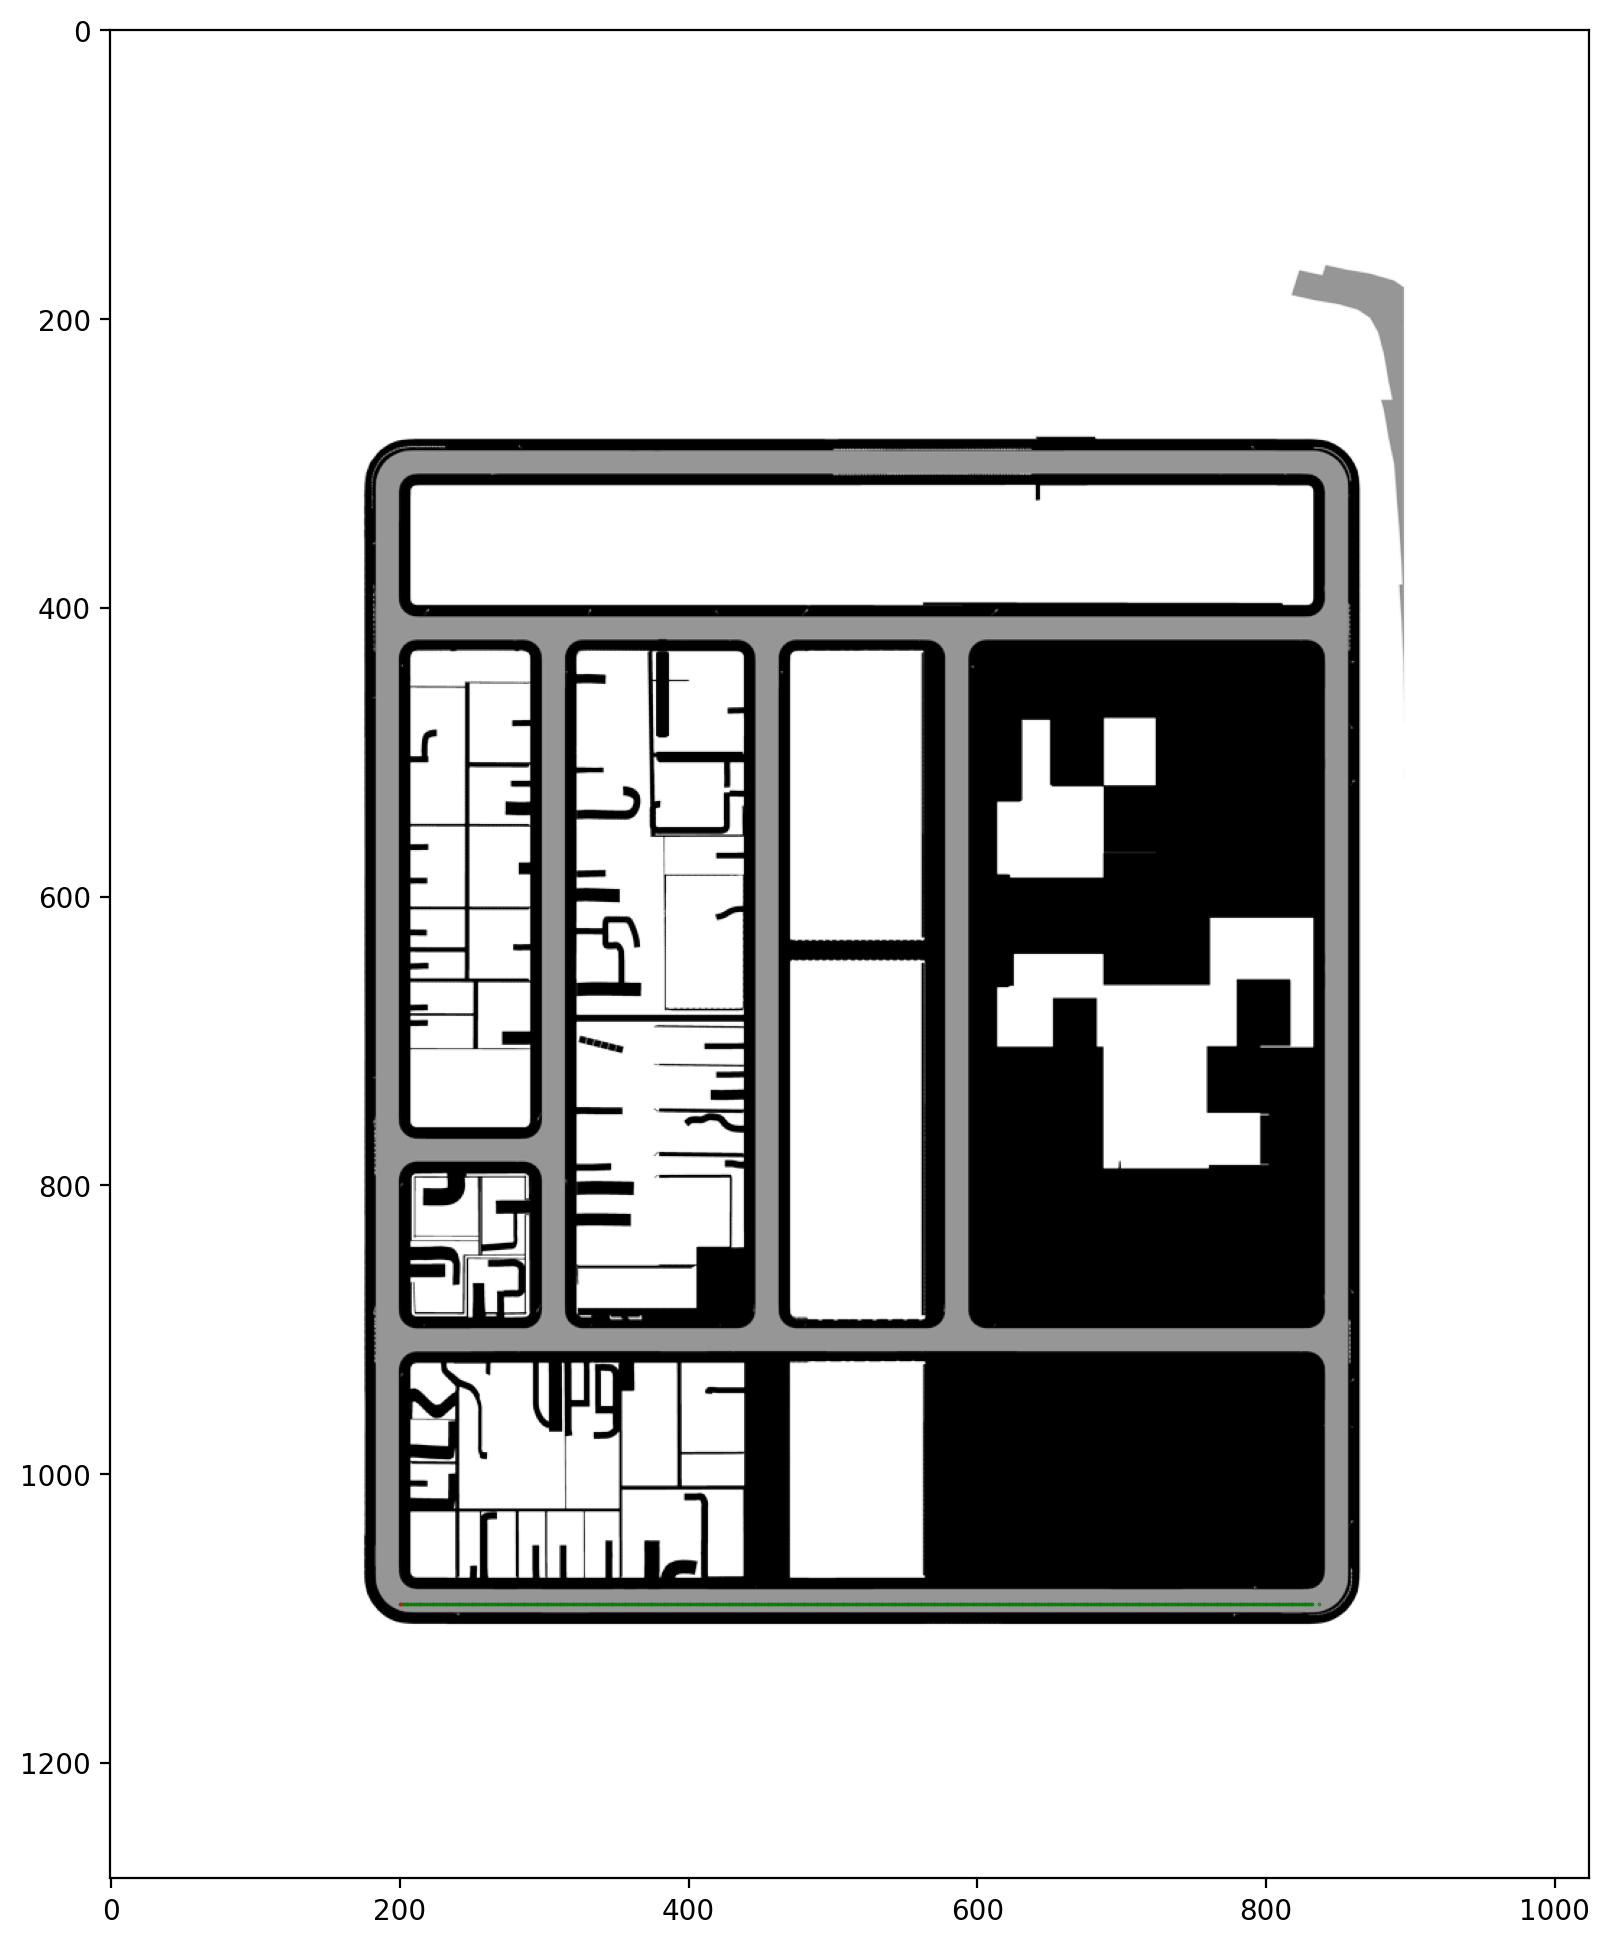

In [34]:
plt.imshow(map, cmap='Greys')
plt.scatter(rx, ry, c='g', s=0.1)
plt.scatter(x0, y0, c='r', s=0.1)

plt.show()